## Github Classroom
Github project repository: https://github.com/cs418-fa24/project-check-in-team-11

## Project Introduction
Our project aims to understand the spotify song classification/reccomendation algorithm and to see if it can be accurately recreated. Through gathering songs and their respective specific statistics from Spotify, we will determine what aspects of songs does Spotify use the most to determine the mood classification of songs. In turn, we will then evaluate whether or not an overall mood can be determined accurately from a user's liked songs library.

## Scope Adjustments
We wanted to try and recreate the Spotify wrapped, however that was a large scope and more tailored towards recreating a listening profile based on other non-song related data such as listening history, time of day, and artist preference. We pivoted the scope to focus on song related data such as track features revolving around tempo, loudness, energy, danceability, etc.

## Data Collection and Cleaning

### Retrieve Liked Songs

In [ ]:
import json

import spotipy
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

# Get the user's liked songs
results = sp.current_user_saved_tracks()
liked_songs = []

while results:
    for item in results['items']:
        track = item['track']
        features = sp1.audio_features(track['id'])[0]
        liked_songs.append({
            'name': track['name'],
            'id': track['id'],
            'acousticness': features['acousticness'],
            'danceability': features['danceability'],
            'duration_ms': features['duration_ms'],
            'energy': features['energy'],
            'instrumentalness': features['instrumentalness'],
            'key': features['key'],
            'liveness': features['liveness'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'valence': features['valence']
        })

    results = sp.next(results)

#TODO rename the file so that it does not overwrite anyone else's
with open('/Users/conrad/dev-school/418/final-project/raw/liked_songs_1.json', 'w') as json_file:
    json.dump(liked_songs, json_file, indent=4)


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=21hsqOOUfdSjHi3SVz8oyv:
 Max Retries, reason: too many 429 error responses

### Retrieve Spotify-generated Playlists for Each Mood (happy, sad, energetic, chill)

In [ ]:
### Steps to get playlists ready to pull
# 1.) Find your mix playlists for each mood (happy, sad, energetic, chill)
# 2.) Click on the "..." and add to another playlist and create a new one. Spotify will create a default name "<mood> Mix (2)"
# 3.) Once you repeat this for all the moods, you are ready to use this script

import json
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# TODO insert info same as library.py...
CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

for mood, p_id in moods.items():
    results = sp.playlist_items(p_id)
    tracks = []

    while results:
        for item in results['items']:
            track = item['track']
            features = sp1.audio_features(track['id'])[0]

            if features is None:
                continue

            tracks.append({
                'name': track['name'],
                'id': track['id'],
                'acousticness': features['acousticness'],
                'danceability': features['danceability'],
                'duration_ms': features['duration_ms'],
                'energy': features['energy'],
                'instrumentalness': features['instrumentalness'],
                'key': features['key'],
                'liveness': features['liveness'],
                'loudness': features['loudness'],
                'mode': features['mode'],
                'speechiness': features['speechiness'],
                'tempo': features['tempo'],
                'time_signature': features['time_signature'],
                'valence': features['valence']
            })
        print("mood complete")
        # get next set of tracks
        results = sp.next(results)

    #TODO make sure to enter the number corresponding to your data
    num = 1
    with open(f'spotify_{mood.lower()}_{num}.json', 'w') as file:
        json.dump(tracks, file, indent=4)

    file.close()


### Import into Pandas Dataframe

In [2]:
import json
import pandas as pd

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)


final_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


FileNotFoundError: [Errno 2] No such file or directory: '../raw/spotify_happy_1.json'

## Data Exploration
Our project's data consists of multiple JSON files, each representing different sets of Spotify songs categorized by moods such as chill, energetic, happy, and sad, along with a separate collection of liked songs from personal user libraries. These files contain attributes that are important in understanding song characteristics which may influence their mood classification, such as tempo, loudness, energy, danceability, and others.

In our preliminary analysis, we explored how these attributes distribute across various playlists to hypothesize which features might be most influential in determining a song's mood. We encountered significant challenges due to the size of the data files and API rate limits.

Interestingly, initial visualizations suggest clear distinctions in certain attributes among different mood-based playlists; for instance, songs in the happy playlist tend to have higher valence and tempo compared to those in the sad playlist. This aligns with our objective to differentiate between the patterns that could potentially recreate Spotify's mood classification logic. Moving forward, we plan to apply statistical tests to confirm these observations and refine our models accordingly, aiming to predict mood classifications with high accuracy.

In [1]:
import pandas as pd
import json
import numpy as np

dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    # f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

liked_songs_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
liked_songs_df = liked_songs_df.drop(columns=drop)

#liked_songs_df.head(5)
liked_songs_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000
mean,0.281464,0.671250,217717.566550,0.597156,0.211037,5.384413,0.175260,-8.426431,0.548161,0.120464,117.196012,3.944834,0.546951
std,0.277863,0.162456,77039.909167,0.188689,0.338679,3.694089,0.135396,3.738940,0.497784,0.119723,28.406264,0.350863,0.234064
min,0.000005,0.000000,15967.000000,0.008580,0.000000,0.000000,0.019000,-36.856000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051775,0.578000,169469.000000,0.478000,0.000000,2.000000,0.094875,-9.964500,0.000000,0.039075,95.025750,4.000000,0.370750
50%,0.182000,0.699000,207177.500000,0.611000,0.000325,5.000000,0.122000,-7.711500,1.000000,0.063350,114.605500,4.000000,0.555000
75%,0.456250,0.787250,254793.500000,0.734000,0.374000,9.000000,0.212000,-5.983500,1.000000,0.168000,132.332250,4.000000,0.740000
max,0.996000,0.978000,828560.000000,0.996000,0.973000,11.000000,0.983000,-1.345000,1.000000,0.918000,215.449000,5.000000,0.981000


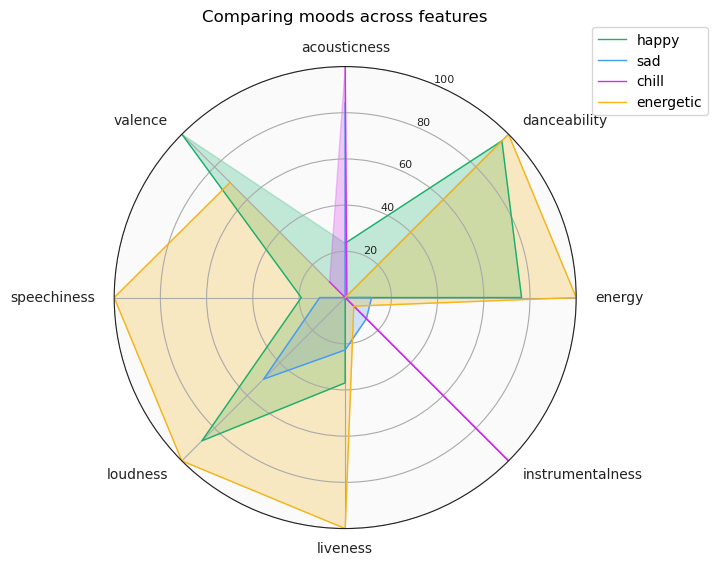

In [19]:
import matplotlib.pyplot as plt

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)

moods_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
moods_df = moods_df.drop(columns=drop)

#moods_df.head(5)
#moods_df.describe()

moods_mean_df = moods_df.groupby('mood').mean()

#moods_mean_df.head(4)

factors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

new_max = 100
new_min = 0
new_range = new_max - new_min

for factor in factors:
    max_val = moods_mean_df[factor].max()
    min_val = moods_mean_df[factor].min()
    val_range = max_val - min_val
    moods_mean_df[factor + '_Adj'] = moods_mean_df[factor].apply(
        lambda x: (((x - min_val) * new_range) / val_range) + new_min)
    
moods_mean_df = moods_mean_df.reset_index()
moods_mean_df.head(4)
 
dft = moods_mean_df.loc[:, ['mood', 'acousticness_Adj', 'danceability_Adj', 'energy_Adj',
                             'instrumentalness_Adj', 'liveness_Adj', 'loudness_Adj', 'speechiness_Adj',
                             'valence_Adj']]
dft.rename(columns={
    'acousticness_Adj': 'acousticness',
    'danceability_Adj': 'danceability',
    'energy_Adj': 'energy',
    'instrumentalness_Adj': 'instrumentalness',
    'liveness_Adj': 'liveness',
    'loudness_Adj': 'loudness',
    'speechiness_Adj': 'speechiness',
    'valence_Adj': 'valence'
}, inplace=True)

dft.set_index('mood', inplace=True)

labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_to_radar(mood, color):
    values = dft.loc[mood].tolist()
    ax.plot(angles, values, color=color, linewidth=1, label=mood)
    ax.fill(angles, values, color=color, alpha=0.25)

add_to_radar('happy', '#1aaf6c')
add_to_radar('sad', '#429bf4')
add_to_radar('chill', '#d42cea')
add_to_radar('energetic', '#f4b41a')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

ax.set_ylim(0, 100)
ax.set_rlabel_position(180 / num_vars)

ax.tick_params(colors='#222222')
ax.tick_params(axis='y', labelsize=8)
ax.grid(color='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')

ax.set_title('Comparing moods across features', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


In [10]:
happy_df = moods_df[moods_df['mood'] == 'happy']
# happy_df.head(5)
happy_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.228003,0.699980,194467.153333,0.675430,0.050095,5.266667,0.173191,-6.669817,0.650000,0.076948,119.553113,3.980000,0.703342
std,0.221277,0.115443,45106.245635,0.147835,0.169320,3.488474,0.147277,2.635357,0.477767,0.086437,24.054849,0.230457,0.191693
min,0.000038,0.197000,60942.000000,0.166000,0.000000,0.000000,0.024600,-22.602000,0.000000,0.026300,68.837000,1.000000,0.064600
25%,0.042775,0.633000,169783.000000,0.567000,0.000000,2.000000,0.085575,-7.986250,0.000000,0.036675,103.655750,4.000000,0.550750
50%,0.165000,0.712000,197575.000000,0.683000,0.000007,5.000000,0.113000,-6.220500,1.000000,0.045950,117.684000,4.000000,0.738000
75%,0.352750,0.780250,218013.000000,0.791000,0.001670,8.250000,0.209500,-4.873250,1.000000,0.077675,129.292500,4.000000,0.860000
max,0.972000,0.935000,473013.000000,0.991000,0.978000,11.000000,0.955000,-1.931000,1.000000,0.711000,209.688000,5.000000,0.981000


In [11]:
sad_df = moods_df[moods_df['mood'] == 'sad']
# sad_df.head(5)
sad_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.522723,0.558353,199938.663333,0.432511,0.131883,5.366667,0.161904,-9.853107,0.690000,0.071891,114.860097,3.860000,0.324138
std,0.338082,0.150576,55978.912548,0.204289,0.277139,3.531827,0.119905,3.796737,0.463266,0.092606,30.075703,0.477311,0.189012
min,0.000008,0.174000,57370.000000,0.014800,0.000000,0.000000,0.051100,-27.117000,0.000000,0.024700,59.981000,1.000000,0.034100
25%,0.159000,0.457000,161423.000000,0.286750,0.000000,2.000000,0.101000,-12.072500,0.000000,0.031500,88.491750,4.000000,0.180000
50%,0.609500,0.556500,200738.000000,0.415000,0.000310,5.000000,0.115000,-9.313000,1.000000,0.041000,113.983000,4.000000,0.295500
75%,0.830000,0.669000,237807.000000,0.571250,0.038100,8.000000,0.167000,-7.115250,1.000000,0.062625,133.993500,4.000000,0.432750
max,0.989000,0.946000,400560.000000,0.941000,0.962000,11.000000,0.938000,-2.810000,1.000000,0.777000,220.099000,5.000000,0.961000


In [7]:
chill_df = moods_df[moods_df['mood'] == 'chill']
# chill_df.head(5)
chill_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood
600,0.0978,0.723,62216,0.801,0.8270,4,0.3860,-8.253,1,0.1130,87.950,4,0.918,chill
601,0.3690,0.424,246186,0.439,0.7960,4,0.1050,-15.861,0,0.0552,94.021,4,0.278,chill
602,0.2210,0.844,332821,0.558,0.0304,1,0.0693,-10.005,1,0.1000,116.969,4,0.818,chill
603,0.6770,0.646,238787,0.564,0.8690,2,0.1040,-12.531,1,0.0390,96.707,4,0.360,chill
604,0.8230,0.588,135276,0.302,0.8720,11,0.1070,-25.685,1,0.0456,77.990,4,0.885,chill


In [8]:
energetic_df = moods_df[moods_df['mood'] == 'energetic']
# energetic_df.head(5)
energetic_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood
898,0.5440,0.900,111429,0.703,0.08170,0,0.2630,-5.615,1,0.1170,111.976,4,0.8100,energetic
899,0.2610,0.835,254125,0.655,0.77600,7,0.1850,-9.309,0,0.0838,114.963,4,0.1930,energetic
900,0.0367,0.694,182040,0.874,0.09630,5,0.9550,-5.988,0,0.0413,130.007,4,0.8770,energetic
901,0.0464,0.872,263036,0.454,0.82500,11,0.0930,-11.462,1,0.0541,118.022,4,0.0877,energetic
902,0.2500,0.641,272933,0.764,0.00173,5,0.0687,-6.862,0,0.0349,124.054,4,0.7860,energetic


## Data Visualization
For each mood, we pick a characteristic to see weather it can be relevant to distinguish between moods.

In [ ]:
# create assumptions and histograms for features for each mood

## ML Data Analysis

### Model Training



In [7]:
from sklearn.linear_model import (
    LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet,
    BayesianRidge, SGDRegressor, SGDClassifier, Perceptron, PassiveAggressiveRegressor,
    PassiveAggressiveClassifier, RidgeClassifier, RidgeCV, LassoCV, ElasticNetCV
)

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,
    GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor,
    BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor,
    VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
)

from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import (
    KMeans, MiniBatchKMeans, MeanShift, SpectralClustering, AgglomerativeClustering,
    DBSCAN, OPTICS, Birch, AffinityPropagation
)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import json
import pandas as pd
import json
import numpy as np
from sklearn.preprocessing import LabelEncoder

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'/Users/conrad/dev-school/418/final-project/raw/spotify_{mood}_1.json',
        # f'/Users/conrad/dev-school/418/final-project/raw/spotify_{mood}_2.json',
        f'/Users/conrad/dev-school/418/final-project/raw/spotify_{mood}_3.json',
        f'/Users/conrad/dev-school/418/final-project/raw/spotify_{mood}_4.json',
        f'/Users/conrad/dev-school/418/final-project/raw/spotify_{mood}_5.json',
        # f'/Users/conrad/dev-school/418/final-project/raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

final_df.to_csv('training.csv')

#splitting
X = final_df.iloc[:, 0:13]
Y = final_df.iloc[:, 13]
# encoder = LabelEncoder()
# y = encoder.fit_transform(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2, random_state=1)

# k-fold
k = 10
forest = RandomForestClassifier(random_state=2)
scores = cross_val_score(forest, xtrain, ytrain, cv=k)
print('CV scores', scores)
print('Mean CV scores', np.mean(scores))

# single
forest.fit(xtrain, ytrain)
print('Fit Score', forest.score(xtest, ytest))


CV scores [0.65625    0.796875   0.65625    0.734375   0.609375   0.859375
 0.609375   0.65625    0.66666667 0.66666667]
Mean CV scores 0.6911458333333333
Fit Score 0.7125


## Analysis

Based on the output below, we can see the percentage of tracks classified as a certain mood. 
Talk a little bit more about the individual outputs.

In [8]:
#analysis

import json
import pandas as pd

dfs = []

files = [
    f'/Users/conrad/dev-school/418/final-project/raw/liked_songs_1.json',
    # f'/Users/conrad/dev-school/418/final-project/raw/liked_songs_2.json',
    f'/Users/conrad/dev-school/418/final-project/raw/liked_songs_3.json',
    f'/Users/conrad/dev-school/418/final-project/raw/liked_songs_4.json',
    # f'/Users/conrad/dev-school/418/final-project/raw/liked_songs_5.json',
    # f'/Users/conrad/dev-school/418/final-project/raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

#processing
drop = ['name', 'id']
for i in range(0, 3):
    dfs[i] = dfs[i].drop(columns=drop)

predictions = []

for df in dfs:
    predictions.append(forest.predict(df.iloc[:, :]))

person = 1
for prediction in predictions:
    print(f'Person {person}')
    print('Happy', (prediction.tolist().count('happy')/len(prediction.tolist()))*100)
    print('Sad', (prediction.tolist().count('sad')/len(prediction.tolist()))*100)
    print('Chill', (prediction.tolist().count('chill')/len(prediction.tolist()))*100)
    print('Energetic', (prediction.tolist().count('energetic')/len(prediction.tolist()))*100)
    print()
    person += 1

Person 1
Happy 26.87007874015748
Sad 13.385826771653544
Chill 37.99212598425197
Energetic 21.751968503937007

Person 2
Happy 38.88888888888889
Sad 12.962962962962962
Chill 7.4074074074074066
Energetic 40.74074074074074

Person 3
Happy 14.583333333333334
Sad 62.5
Chill 2.083333333333333
Energetic 20.833333333333336



## Progress reflection
#### Hardest Part of the Project:
The most challenging aspect has been handling the large data sets and managing the Spotify API rate limits, which restricted our ability to retrieve data efficiently. These technical issues required a reevaluation of our data collection strategies, including implementing caching and batching requests to better manage API usage.

#### Initial Insights:
Our exploratory data analysis revealed that certain song attributes like tempo, valence, and energy significantly vary across different moods. For instance, 'happy' songs generally exhibit higher tempo and energy levels than 'sad' songs, which tend to feature lower valence scores.

#### Concrete Results:
While we have not yet applied machine learning models to predict song moods, our preliminary visualizations and statistical analyses confirm that the attributes we are studying do correlate with the categorizations provided by Spotify.

#### Current Problems and Adjustments:
Given the limitations in data acquisition, we need to allocate more time towards enhancing our data processing capabilities to handle large volumes of data more effectively by possibly using different data querying tools. 

#### On Track:
We are on track in terms of understanding the data and setting up the necessary infrastructure for analysis. However, we are being delayer by API limit constraints.

#### Change in Project Direction:
Based on initial findings, focusing more on implementing the different features of this model could be beneficial. Enhancing our feature set by integrating additional data such as user listening habits might improve our model's accuracy and align better with Spotify's algorithm.




## Roles and Coordination

Finding data sources and cleaning (By 11/7):


Data Exploration (By 11/15): Ceasar Attar


Statistical analysis (By 11/15): 


Data Visualization (By 11/23): Ceasar Attar


Machine Learning Applications (By 11/29): 

## Next Steps
### Optimize Data Collection:
Implement more efficient data handling to manage larger datasets without hitting API limits.
### Expand Feature Analysis:
Incorporate additional features from user profiles to enrich our predictive models.
### Model Development:
Start training preliminary machine learning models using the cleaned and processed data.
### Evaluate Progress:
We will assess our model's performance based on its accuracy in classifying song moods and adjust our strategies accordingly. This evaluation will help us determine if our approach aligns with the project's goals and Spotify's classification standards.